In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cdf = pd.read_csv('data/churn.csv')
display(cdf.head())
display(cdf.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Loyal clients to those who left')

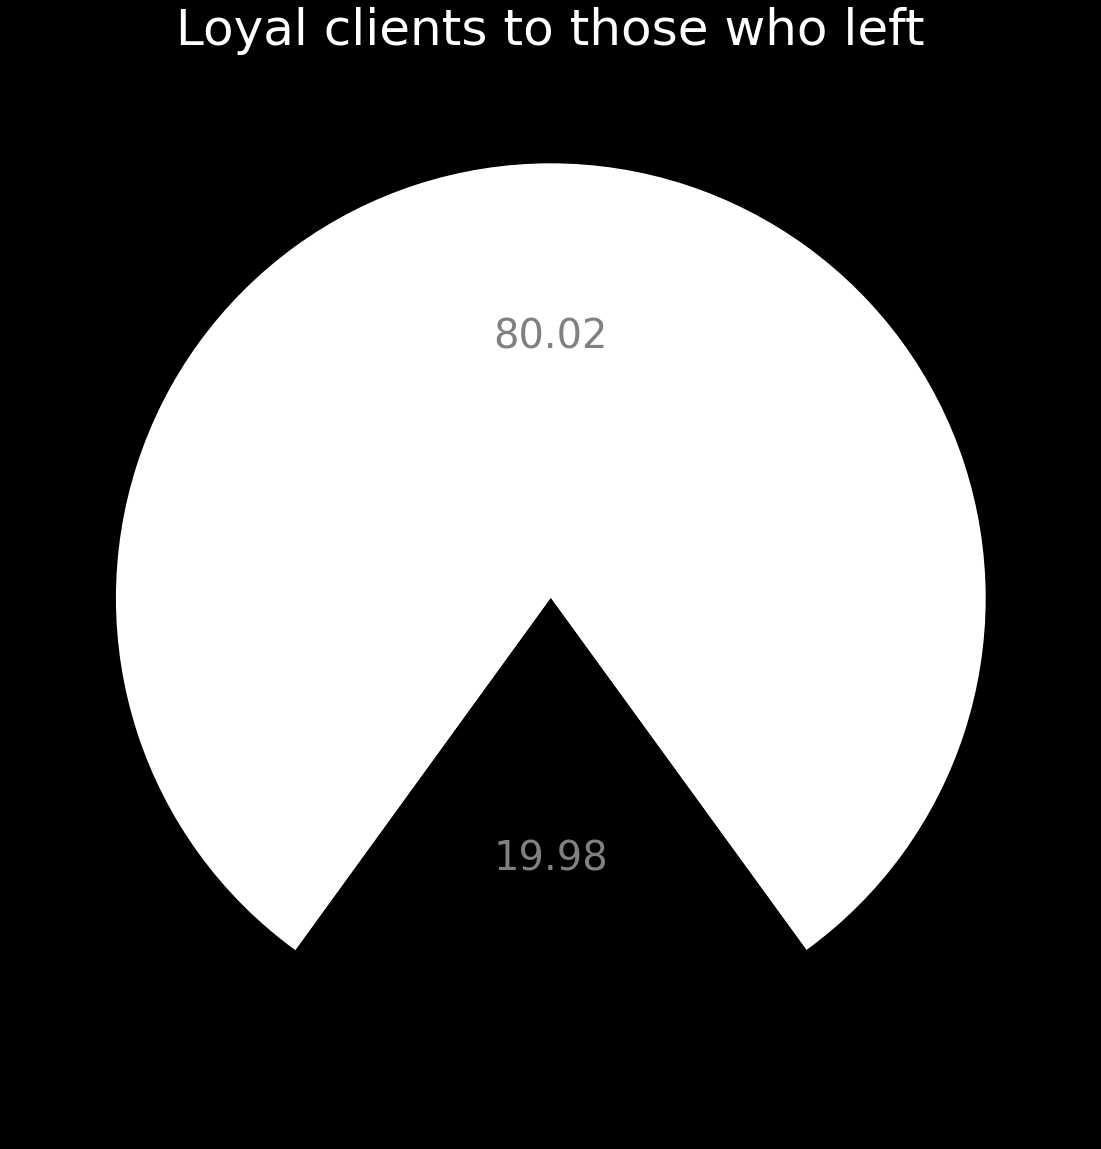

In [3]:
cdf['Exited'] = cdf['Exited'].astype(bool)
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

cdf.groupby(['Exited']).sum().plot(labels=None,\
    kind='pie', autopct=autopct, y='RowNumber',\
    figsize=(20,20), colors = ['white', 'black'],\
    fontsize=40, legend=False,  yticks=(),\
    xticks=(), startangle=-54, textprops={'color':"gray", 'fontsize':40},\
    xlabel='', ylabel='')
plt.title('Loyal clients to those who left', fontsize=50)


Из всех клиентов, о которых собраны данные, расторгли отношения с компанией только ~20%. 4\5 продолжают быть лояльны ей.

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [9]:
mask = cdf[cdf['Balance']>2500]

mask_2=mask
mask_2 = mask_2.astype({"Exited":'bool'})
mask_2 = mask_2.astype({"Gender":'category'})
display(mask_2['Exited'].value_counts())
mask_2=mask_2.groupby(by='Exited')['Balance']



def outliers_z_score_mod(data,feature,left=3,right=3,log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    
    return outliers, cleaned, lower_bound, upper_bound
    
outliers, cleaned, lower_bound, upper_bound =\
    outliers_z_score_mod(mask, 'Balance', 3, 3,log_scale=False)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=mask, 
    x='Balance',
    bins=100,
    ax=axes[0],
)
histplot1.set_title('Dispersion of money in clients', fontsize=40)
histplot1.set_ylabel('Clients',fontsize=20)

histplot2 = sns.histplot(
    data=mask,
    x='Balance',
    y='Exited',
    bins=100,
    color='red',
    ax=axes[1]
)
histplot2.set_xlabel('Client\'s balance',fontsize=20)
histplot2.set_ylabel('Gender',fontsize=20)

histplot1.axvline(mask['Balance'].mean(), color='w', lw=3)
histplot1.axvline(lower_bound, color='w', lw=3)
histplot1.axvline(upper_bound, color='w', lw=3)

False    4846
True     1537
Name: Exited, dtype: int64

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

<Figure size 1440x1440 with 2 Axes>

Получается почти равносторонний колокол по обе стороны среднего, что демонстрирует нормальное распределение данных о счетах клиентов.

При разделении по признаку пола, мужской пик зарплаты оказывается выше женского.

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.



### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.